In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

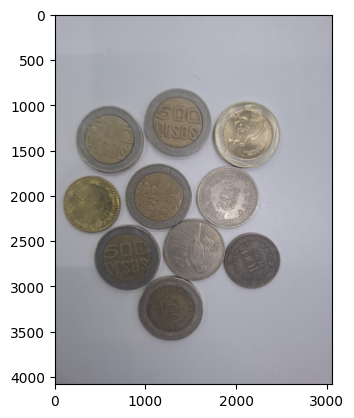

In [8]:
img = cv2.imread('monedas.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Pasar la imagen a escala de grises

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

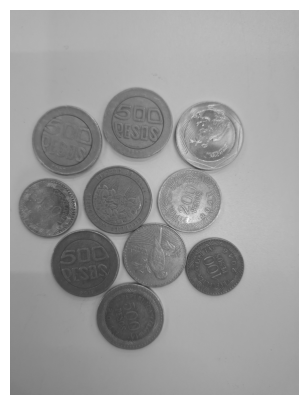

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Ahora se binariza la imagen

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

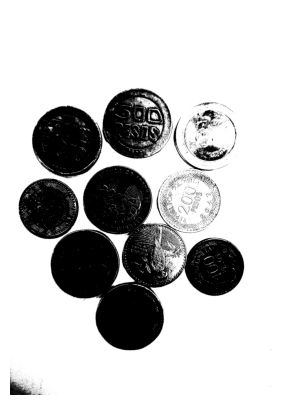

In [24]:
imgbin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(10, 5))
plt.imshow(imgbin, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Se invierten las intensidades

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

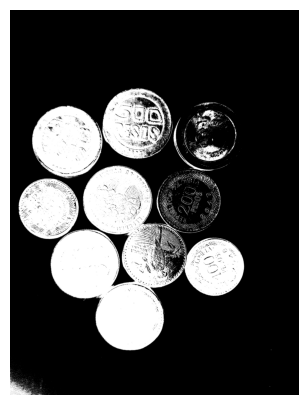

In [25]:
imgbin2 = 255 - imgbin
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Se procede a erosionar la imagen

(np.float64(-0.5), np.float64(3059.5), np.float64(4079.5), np.float64(-0.5))

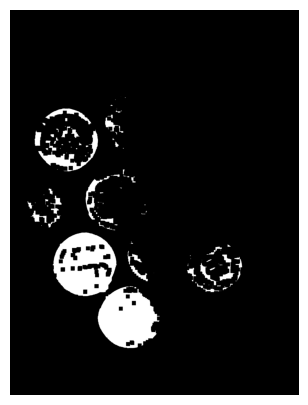

In [27]:
imgbin2_erosion = cv2.erode(imgbin2, np.ones((5, 5), np.uint8), iterations=10)
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2_erosion, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

In [28]:
_, markers = cv2.connectedComponents(imgbin2_erosion)

In [29]:
np.unique(markers)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109], dtype=int32)